In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
import json
import requests
import numpy

In [127]:
raw_df = pd.read_csv("mock_student_data.csv")

In [5]:
raw_df.describe()

,ID,Age,GPA,Days_missed
count,1000.000000,771.000000,779.000000,808.000000
mean,500.500000,16.996109,2.988447,18.011139
std,288.819436,1.458067,0.818249,9.629371
min,1.000000,15.000000,2.000000,2.000000
25%,250.750000,16.000000,2.000000,9.000000
50%,500.500000,17.000000,3.000000,18.000000
75%,750.250000,18.000000,4.000000,27.000000
max,1000.000000,19.000000,4.000000,34.000000


In [8]:
raw_df.median()

ID             500.5
Age             17.0
GPA              3.0
Days_missed     18.0
dtype: float64

In [9]:
raw_df.mode()

,ID,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
0,NaN,Amy,Ross,Texas,Female,15,2,6,Yes
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN


In [13]:
raw_df.isnull().sum()

ID               0
First_name       0
Last_name        0
State          116
Gender         226
Age            229
GPA            221
Days_missed    192
Graduated        0
dtype: int64

[14, 20, 0, 180]

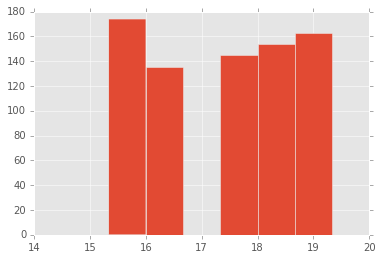

In [97]:
raw_df['Age'].hist(bins=6, align='right').axis([14, 20, 0, 180])

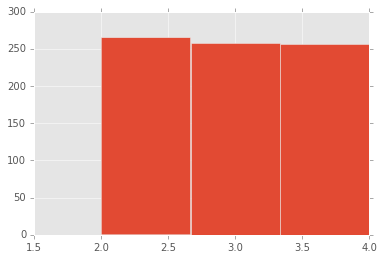

In [124]:
raw_df['GPA'].hist(bins=3)

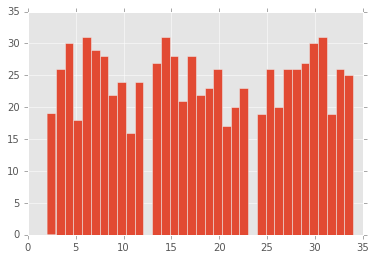

In [57]:
raw_df['Days_missed'].hist(bins=35)

In [146]:
for i, frame in raw_df['Gender'].iteritems():
    if pd.isnull(frame):
        name = raw_df.xs(i)['First_name']
        r = requests.get('https://api.genderize.io/?name=' + name)
        gender = r.json()['gender']
        raw_df.set_value(i, 'Gender', gender)

In [152]:
raw_df.to_csv('mock_with_gender.csv')

In [175]:
df = pd.read_csv('mock_with_gender.csv')
mean_age = df['Age'].mean()
mean_gpa = df['GPA'].mean()
mean_days_missed = df['Days_missed'].mean()

In [180]:
for i, frame in df['Age'].iteritems():
    if pd.isnull(frame):
        df.set_value(i, 'Age', mean_age)

for i, frame in df['GPA'].iteritems():
    if pd.isnull(frame):
        df.set_value(i, 'GPA', mean_gpa)

for i, frame in df['Days_missed'].iteritems():
    if pd.isnull(frame):
        df.set_value(i, 'Days_missed', mean_days_missed)
        
df.to_csv('mock_with_means.csv')


In [189]:
df = pd.read_csv('mock_with_gender.csv')
graduated = df[df['Graduated']=='Yes']
mean_age_gr = graduated['Age'].mean()
print(mean_age_gr)
mean_gpa_gr = graduated['GPA'].mean()
print(mean_gpa_gr)
mean_dm_gr = graduated['Days_missed'].mean()
print(mean_dm_gr)

not_graduated = df[df['Graduated']=='No']
mean_age_ngr = not_graduated['Age'].mean()
print(mean_age_ngr)
mean_gpa_ngr = not_graduated['GPA'].mean()
print(mean_gpa_ngr)
mean_dm_ngr = not_graduated['Days_missed'].mean()
print(mean_dm_ngr)

16.9588744589
3.50537634409
16.7755610973
17.0517799353
2.51597051597
19.2285012285


In [191]:
for i, frame in df['Age'].iteritems():
    if pd.isnull(frame):
        if df.xs(i)['Graduated'] == 'Yes':
            df.set_value(i, 'Age', mean_age_gr)
        else:
            df.set_value(i, 'Age', mean_age_ngr)

for i, frame in df['GPA'].iteritems():
    if pd.isnull(frame):
        if df.xs(i)['Graduated'] == 'Yes':
            df.set_value(i, 'GPA', mean_gpa_gr)
        else:
            df.set_value(i, 'GPA', mean_gpa_ngr)

for i, frame in df['Days_missed'].iteritems():
    if pd.isnull(frame):
        if df.xs(i)['Graduated'] == 'Yes':
            df.set_value(i, 'Days_missed', mean_dm_gr)
        else:
            df.set_value(i, 'Days_missed', mean_dm_ngr)

In [192]:
df.to_csv('mock_with_cond_means.csv')

In [201]:
graduated_female = graduated[graduated['Gender']=='Female']
graduated_male = graduated[graduated['Gender']=='Male']
print('graduated - female')
mean_fage_gr = graduated_female['Age'].mean()
print(mean_fage_gr)
mean_fgpa_gr = graduated_female['GPA'].mean()
print(mean_fgpa_gr)
mean_fdm_gr = graduated_female['Days_missed'].mean()
print(mean_fdm_gr)

print('graduated - male')
mean_mage_gr = graduated_male['Age'].mean()
print(mean_mage_gr)
mean_mgpa_gr = graduated_male['GPA'].mean()
print(mean_mgpa_gr)
mean_mdm_gr = graduated_male['Days_missed'].mean()
print(mean_mdm_gr)

ngraduated_female = not_graduated[not_graduated['Gender']=='Female']
ngraduated_male = not_graduated[not_graduated['Gender']=='Male']
print('not_graduated - female')
mean_fage_ngr = ngraduated_female['Age'].mean()
print(mean_fage_ngr)
mean_fgpa_ngr = ngraduated_female['GPA'].mean()
print(mean_fgpa_ngr)
mean_fdm_ngr = ngraduated_female['Days_missed'].mean()
print(mean_fdm_ngr)

print('not_graduated - male')
mean_mage_ngr = ngraduated_male['Age'].mean()
print(mean_mage_ngr)
mean_mgpa_ngr = ngraduated_male['GPA'].mean()
print(mean_mgpa_ngr)
mean_mdm_ngr = ngraduated_male['Days_missed'].mean()
print(mean_mdm_ngr)


graduated - female
16.967611336
3.5412371134
17.79342723
graduated - male
16.9488372093
3.46629213483
15.6223404255
not_graduated - female
16.9677419355
2.51442307692
19.2980769231
not_graduated - male
17.1363636364
2.5175879397
19.1557788945


In [204]:
df = pd.read_csv('mock_with_gender.csv')

for i, frame in df['Age'].iteritems():
    if pd.isnull(frame):
        if df.xs(i)['Graduated'] == 'Yes':
            if df.xs(i)['Gender'] == 'Female':
                df.set_value(i, 'Age', mean_fage_gr)
            else:
                df.set_value(i, 'Age', mean_mage_gr)
        else:
            if df.xs(i)['Gender'] == 'Female':
                df.set_value(i, 'Age', mean_fage_ngr)
            else:
                df.set_value(i, 'Age', mean_mage_ngr)

for i, frame in df['GPA'].iteritems():
    if pd.isnull(frame):
        if df.xs(i)['Graduated'] == 'Yes':
            if df.xs(i)['Gender'] == 'Female':
                df.set_value(i, 'GPA', mean_fgpa_gr)
            else:
                df.set_value(i, 'GPA', mean_mgpa_gr)
        else:
            if df.xs(i)['Gender'] == 'Female':
                df.set_value(i, 'GPA', mean_fgpa_ngr)
            else:
                df.set_value(i, 'GPA', mean_mgpa_ngr)

for i, frame in df['Days_missed'].iteritems():
    if pd.isnull(frame):
        if df.xs(i)['Graduated'] == 'Yes':
            if df.xs(i)['Gender'] == 'Female':
                df.set_value(i, 'Days_missed', mean_fdm_gr)
            else:
                df.set_value(i, 'Days_missed', mean_mdm_gr)
        else:
            if df.xs(i)['Gender'] == 'Female':
                df.set_value(i, 'Days_missed', mean_fdm_ngr)
            else:
                df.set_value(i, 'Days_missed', mean_mdm_ngr)
            
df.to_csv('mock_partc.csv')